### Minicurso LABREN explorando dados com IA 🚀
Neste minicurso, você aprenderá a explorar conjuntos de dados utilizando a ajuda de um assistente de IA. Usaremos um contjunto de dados metorológicos para analisar suas variáveis e gerar visualizações que facilitam a interpretação dos resultados.

- Dados Meteorológicos: dados_meteorologicos.parquet


#### Objetivos do Minicurso:

- 🤖 Formular prompts para que a IA auxilie na criação de códigos.
- 🗄️ Integrar SQL com o DuckDB para carregar e manipular dados em formato Parquet.
- 📊 Explorar os dados por meio de consultas SQL para obter insights relevantes.
- 📈 Gerar visualizações (inclusive espaciais) que facilitam a interpretação dos resultados, aproveitando as coordenadas presentes nos dados.

#### Cronograma:

1. Introdução e Objetivos:

- Apresentação do minicurso e dos conjuntos de dados.
- Explicação do papel da IA na criação de código e análise de dados.

2. Configuração do Ambiente:

- Importar bibliotecas para abrir dados em formato Parquet, manipulação e visualização, incluindo visualizações espaciais.

3. Carregamento dos Dados:

- Criar comandos para carregar os dados Parquet.
- Visualizar os 5 primeiros registros do conjunto de dados.

4. Exploração dos Dados:

- Realizar consultas SQL para explorar as variáveis do conjunto de dados.
- Gerar visualizações para facilitar a interpretação dos resultados.

5. Conclusão:

### 1. Configuração do Ambiente ⚙️

Para começar, vamos importar as bibliotecas necessárias para abrir os dados em formato Parquet, manipulação e visualização, incluindo visualizações espaciais.

In [2]:
# Instale, importe e inicialize bibliotecas para abrir dados no formato Parquet usando DuckDB
# e também bibliotecas para visualização dos dados.
!pip install duckdb pandas matplotlib seaborn

import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Inicialize o DuckDB
con = duckdb.connect(database=':memory:', read_only=False)

DEPRECATION: Loading egg at /Users/helvecioneto/miniconda3/lib/python3.12/site-packages/pyasn1-0.6.1-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/helvecioneto/miniconda3/lib/python3.12/site-packages/google_resumable_media-2.7.2-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/helvecioneto/miniconda3/lib/python3.12/site-packages/rsa-4.9-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/helvecioneto/miniconda3/lib/python3.12/site-p

#### 2. Download e Carregamento dos Dados 📊

Baixe os dados meteorológicos para o ambiente de execução do minicurso. Em seguida, carregue os dados para visualizar os 5 primeiros registros do conjunto de dados.

In [3]:
# Baixe o os arquivos dados_meteorologicos.parquet que estão no google drive
#  ulr vou listar para você:

url_meteoro = 'https://drive.google.com/uc?id=1MES_nefJ_V2ZamOFTXzzHCdtH7Fh0qq2'

# Instale a biblioteca gdown para baixar os arquivos
!pip install gdown

# Baixe os arquivos
import gdown

gdown.download(url_meteoro, 'dados_meteorologicos.parquet', quiet=False)

DEPRECATION: Loading egg at /Users/helvecioneto/miniconda3/lib/python3.12/site-packages/pyasn1-0.6.1-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/helvecioneto/miniconda3/lib/python3.12/site-packages/google_resumable_media-2.7.2-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/helvecioneto/miniconda3/lib/python3.12/site-packages/rsa-4.9-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/helvecioneto/miniconda3/lib/python3.12/site-p

Downloading...
From (original): https://drive.google.com/uc?id=1MES_nefJ_V2ZamOFTXzzHCdtH7Fh0qq2
From (redirected): https://drive.google.com/uc?id=1MES_nefJ_V2ZamOFTXzzHCdtH7Fh0qq2&confirm=t&uuid=ca3d0619-6f86-4ceb-95d8-bd5ec896cb2e
To: /Users/helvecioneto/workshop-2025.1/dados_meteorologicos.parquet
100%|██████████| 163M/163M [04:36<00:00, 591kB/s]  


'dados_meteorologicos.parquet'

In [4]:
# Crie um código para carregar os dados dos arquivos dados_meteorologicos.parquet utilizando o DuckDB.
# Mostre os 5 primeiros registros de cada conjunto como um DataFrame do Pandas.
ARQV_METEOROLOGICO = 'dados_meteorologicos.parquet'

# Crie uma query para gerar uma tabela no DuckDB com os dados meteorológicos caso ela não exista
query = f'CREATE TABLE IF NOT EXISTS dados_meteorologicos AS SELECT * FROM parquet_scan(\'{ARQV_METEOROLOGICO}\')'

# Execute a query
con.execute(query)

In [5]:
# Mostre os 5 primeiros registros da tabela
query = 'SELECT * FROM dados_meteorologicos LIMIT 5'

# Execute a query
df = con.execute(query).fetchdf()
df

,acronym,timestamp,year,day,min,tp_sfc,humid_sfc,press,rain,ws10_avg,ws10_std,wd10_avg,wd10_std
0,FLN,2019-03-01 00:00:00,2019,60,0,22.38,97.7,1010.284,0.72,5.2698,0.923294,23.422166,4.079194
1,FLN,2019-03-01 00:10:00,2019,60,10,21.22,101.1,1010.503,0.00,4.6318,0.352908,29.199733,1.963143
2,FLN,2019-03-01 00:20:00,2019,60,20,21.15,101.1,1010.476,0.18,3.9738,0.713510,33.528020,2.825004
3,FLN,2019-03-01 00:30:00,2019,60,30,21.08,101.1,1010.474,0.00,3.1440,0.646525,22.548946,3.690781
4,FLN,2019-03-01 00:40:00,2019,60,40,21.20,101.1,1010.629,0.00,0.8769,0.440114,58.076207,8.977480


In [6]:
# Crie um código para mostrar a quantidade de registros de cada conjunto de dados.
# Mostre a quantidade de registros de cada estação meteorológica (coluna "acronym").
query = 'SELECT acronym, COUNT(*) AS registros FROM dados_meteorologicos GROUP BY acronym'

# Execute a query
df = con.execute(query).fetchdf()
df

,acronym,registros
0,CAI,65808
1,BJL,105120
2,FLN,411552
3,NAT,263088
4,CBA,26496
5,SMS,302400
6,CTB,65664
7,TMA,166176
8,SLZ,320469
9,PMA,452714


### 4. Visualizações dos Dados 📊

Vamos criar gráficos de linha e barras para visualizar as informações extraídas. 

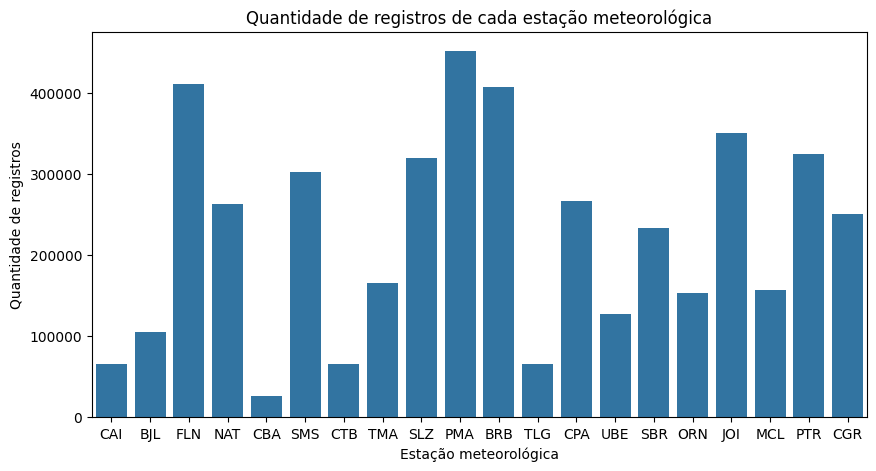

In [7]:
# Plote um gráfico de barras para mostrar a quantidade de registros de cada estação meteorológica.
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='acronym', y='registros')
plt.title('Quantidade de registros de cada estação meteorológica')
plt.xlabel('Estação meteorológica')
plt.ylabel('Quantidade de registros')
plt.show()

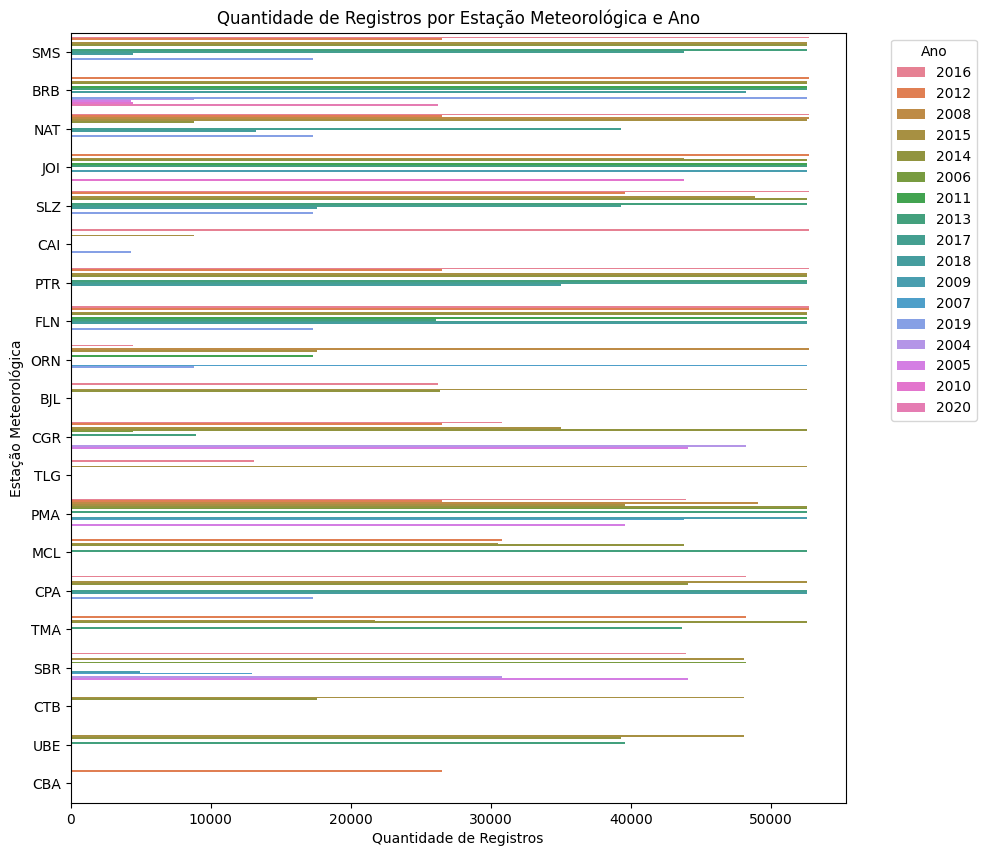

In [8]:
# Plote um gráfico de barras para mostrar a quantidade de registros de cada estação por ano.
# Lembre-se de que a coluna "timestamp" contém a data no formato "YYYY-MM-DD HH:MM:SS".
# Lembre-se também que timestamp é uma palavra reservada do DuckDB, então é necessário usar aspas duplas para referenciar a coluna.
query = 'SELECT acronym,' \
        '       strftime(\'%Y\', "timestamp") AS ano,' \
        '       COUNT(*) AS quantidade_registros' \
        '  FROM dados_meteorologicos' \
        ' GROUP BY acronym, ano' \
        ' ORDER BY quantidade_registros DESC'
# Execute a query
df = con.execute(query).fetchdf()

# Plote o gráfico de barras
plt.figure(figsize=(10, 10))
sns.barplot(data=df, x='quantidade_registros', y='acronym', hue='ano')
plt.xlabel('Quantidade de Registros')
plt.ylabel('Estação Meteorológica')
plt.title('Quantidade de Registros por Estação Meteorológica e Ano')
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

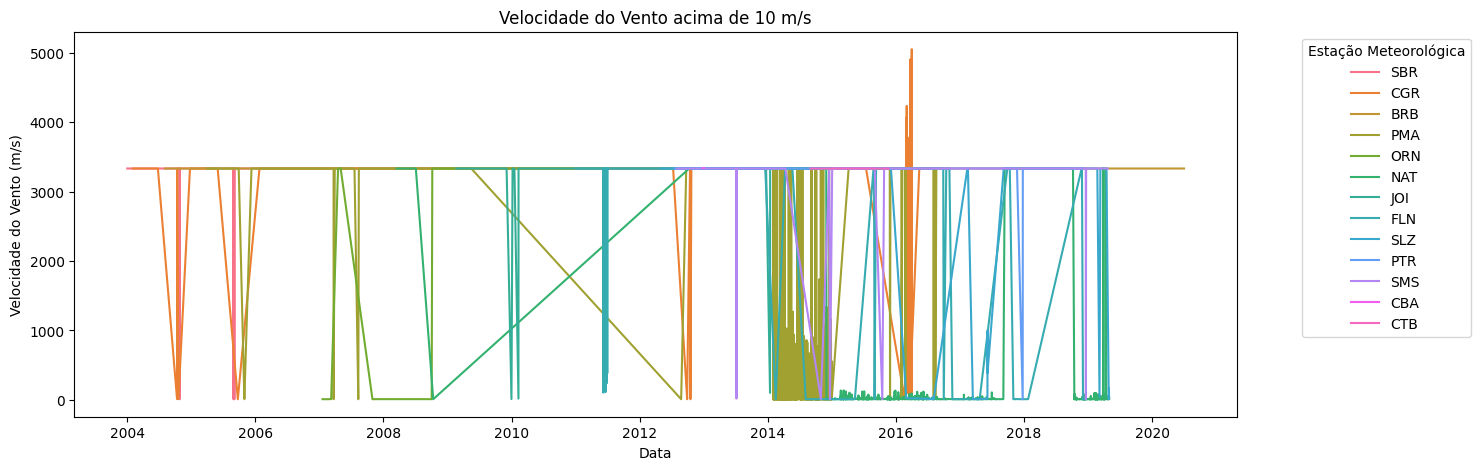

In [12]:
# Mostre quando os anemometros de SMS da colunas "acronym" estão com velocidade do vento acima de 10 m/s. A coluna de vento é "ws10_avg".

query = 'SELECT acronym, "timestamp", ws10_avg' \
        '  FROM dados_meteorologicos' \
        ' WHERE ws10_avg > 10' \
        '   AND ws10_avg IS NOT NULL' \
        ' ORDER BY "timestamp"'
# Execute a query
df = con.execute(query).fetchdf()

# Plote os valores de ws10_avg
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='timestamp', y='ws10_avg', hue='acronym')
plt.xlabel('Data')
plt.ylabel('Velocidade do Vento (m/s)')
plt.title('Velocidade do Vento acima de 10 m/s')
plt.legend(title='Estação Meteorológica', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Plot um gráfico de linhas que mostre os valores médios de temperatura (coluna "tp_sfc") por mês para cada estação meteorológica.
# Lembre-se de que a coluna "timestamp" contém a data no formato "YYYY-MM-DD HH:MM:SS".
# Lembre-se também que timestamp é uma palavra reservada do DuckDB, então é necessário usar aspas duplas para referenciar a coluna.

# Query para calcular a média de temperatura por mês e estação meteorológica
query = 'SELECT acronym,' \
        '       strftime(\'%m\', "timestamp") AS mes,' \
        '       AVG(tp_sfc) AS media_temperatura' \
        '  FROM dados_meteorologicos' \
        ' GROUP BY acronym, mes' \
        ' ORDER BY mes'

# Execute a query
df = con.execute(query).fetchdf()

# Plote o gráfico de linhas
plt.figure(figsize=(10, 10))
sns.lineplot(data=df, x='mes', y='media_temperatura', hue='acronym', marker='o')
plt.xlabel('Mês')
plt.ylabel('Temperatura Média (°C)')
plt.title('Temperatura Média por Mês e Estação Meteorológica')
plt.legend(title='Estação Meteorológica', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



#### 4.1. Gráfico de Boxplot

Vamos criar um gráfico de boxplot para visualizar a distribuição das temperaturas máximas e mínimas.<br>
Você irá montar uma consulta SQL para extrair as informações necessárias e gerar o gráfico.<br>
Caso a consulta esteja incorreta, a IA irá auxiliá-lo a corrigir o código. Para isso selecione o trecho de código e pressione Ctrl + I para chamar a IA.

In [ ]:
# Plot um gráfico para encontrar os outliers da coluna "tp_sfc" (temperatura do ar na superfície) para cada estação meteorológica.
# Utilize um boxplot para cada estação meteorológica apenas com os outliers.
# Lembre-se de que a coluna "timestamp" contém a data no formato "YYYY-MM-DD HH:MM:SS".
# Lembre-se também que timestamp é uma palavra reservada do DuckDB, então é necessário usar aspas duplas para referenciar a coluna.

# Query para encontrar os outliers da temperatura do ar na superfície por estação meteorológica
query = 'SELECT acronym,' \
        '       tp_sfc' \
        '  FROM dados_meteorologicos' \
        ' WHERE tp_sfc < (SELECT Q1 - 1.5 * IQR FROM (SELECT acronym,' \
        '                                                  QUANTILE(tp_sfc, 0.25) AS Q1,' \
        '                                                  QUANTILE(tp_sfc, 0.75) AS Q3,' \
        '                                                  Q3 - Q1 AS IQR' \
        '                                             FROM dados_meteorologicos' \
        '                                            GROUP BY acronym))' \
        '    OR tp_sfc > (SELECT Q3 + 1.5 * IQR FROM (SELECT acronym,' \
        '                                                  QUANTILE(tp_sfc, 0.25) AS Q1,' \
        '                                                  QUANTILE(tp_sfc, 0.75) AS Q3,' \
        '                                                  Q3 - Q1 AS IQR' \
        '                                             FROM dados_meteorologicos' \
        '                                            GROUP BY acronym))'

# Execute a query
df = con.execute(query).fetchdf()


# Plote o boxplot
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x='acronym', y='tp_sfc')
plt.xlabel('Estação Meteorológica')
plt.ylabel('Temperatura do Ar na Superfície (°C)')
plt.title('Outliers da Temperatura do Ar na Superfície por Estação Meteorológica')
plt.show()

#### 5. Conclusão 🚀

Parabéns! Você concluiu o minicurso LABREN explorando dados com IA. Agora você está pronto para aplicar esses conhecimentos em seus próprios projetos. Até a próxima!